# Loading Data and Relevant Imports

In [1]:
import pandas as pd
import numpy as np

In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',
                        index_col='LoanStatNew')
data_info.head(3)

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan


In [6]:
#define a function which enable us to check feature descriptions faster
def feat_info(x):
    print(data_info['Description'].loc[x])

feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [216]:
#loading our data set
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"


In [217]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

We can see there are some missing values in our data set.

# EDA

In [12]:
# loading viz imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

First we check whether the data is well-balanced.

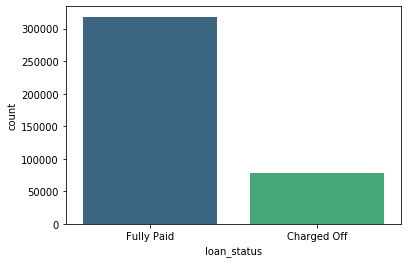

In [13]:
sns.countplot(x='loan_status', data=df, palette='viridis')

Apparently the data mostly consists of info about borrowers who fully paid the money. We may need to focus on how well can our ANN model identify defaulters when we evaluate it later on.

Then we can check the distribution of the amount of loan.

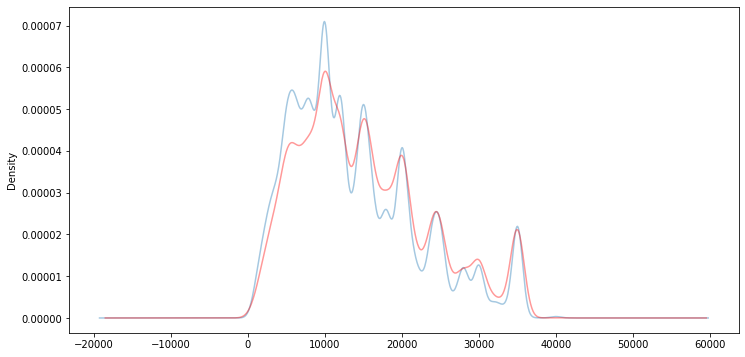

In [30]:
plt.figure(figsize=(12,6))
df[df['loan_status'] == 'Fully Paid']['loan_amnt'].plot(kind='kde', alpha=.4)
df[df['loan_status'] == 'Charged Off']['loan_amnt'].plot(kind='kde', alpha=.4, color='r')

We can see the frequency peaks at 10000, 15000, 20000 and 35000. Most borrowers here applied for a loan of less than 25000.


We can see if there is significant difference in loan amount between the two loan stauts.

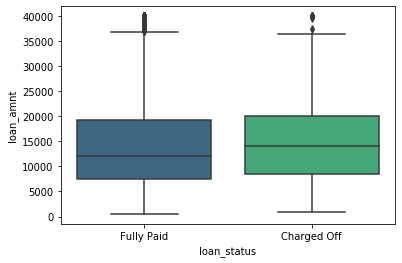

In [24]:
sns.boxplot(x='loan_status', y='loan_amnt', 
            palette='viridis',
            data = df,)

We can also see the relation between annual income and loan amount.

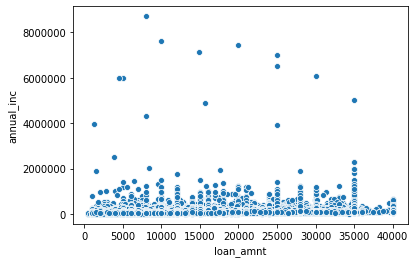

In [32]:
sns.scatterplot(y='annual_inc', x='loan_amnt', data=df)

**Now let's calulate and viz correlations.**

In [33]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


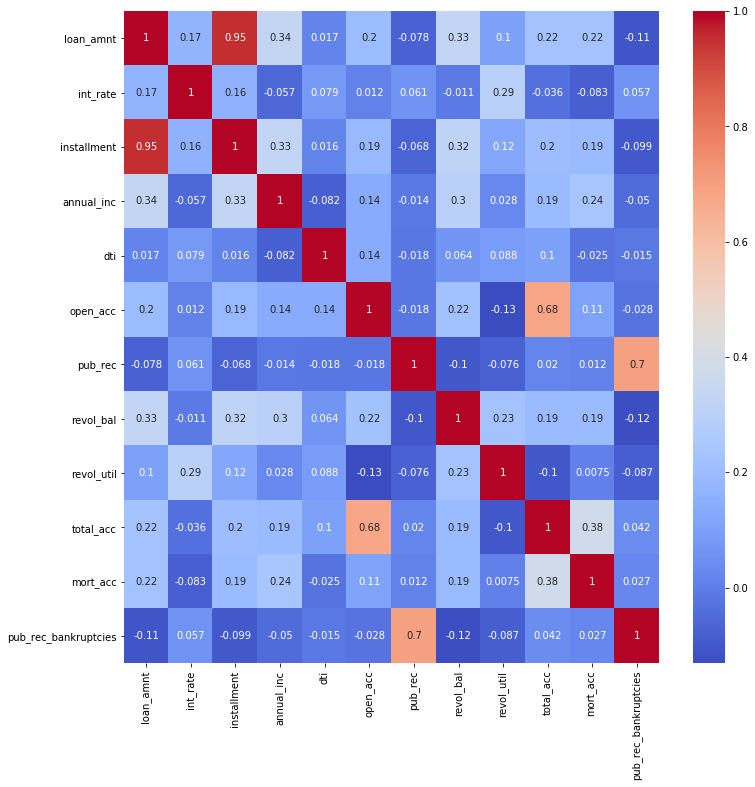

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [38]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [40]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


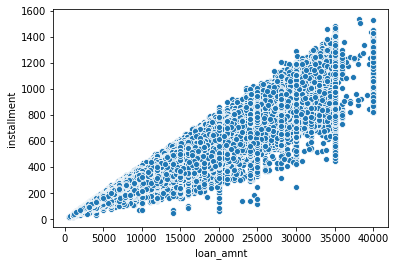

In [39]:
sns.scatterplot(x='loan_amnt', y='installment', data=df)

Clearly, *loan_amnt & installent* provide duplicated info and we may consider to drop one of them in data preprocessing section.

We can also calculate the summary statistics of the loan amount and annual income, grouped by loan status.

In [48]:
df.groupby('loan_status').describe().transpose().loc['loan_amnt']

loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


In [49]:
df.groupby('loan_status').describe().transpose().loc['annual_inc']

loan_status,Charged Off,Fully Paid
count,7.767300e+04,3.183570e+05
mean,6.753554e+04,7.582995e+04
std,5.830346e+04,6.231599e+04
min,0.000000e+00,6.000000e+02
25%,4.200000e+04,4.605053e+04
50%,5.900000e+04,6.500000e+04
75%,8.000000e+04,9.000000e+04
max,8.706582e+06,7.600000e+06


Now we move to *grade* and *subgrade* features.

In [50]:
#get the description of these features
feat_info('grade')

LC assigned loan grade


In [53]:
feat_info('sub_grade')

LC assigned loan subgrade


In [54]:
#see the unique values of these variables
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [55]:
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

We can viz the grade info by creating a countplot per grade.

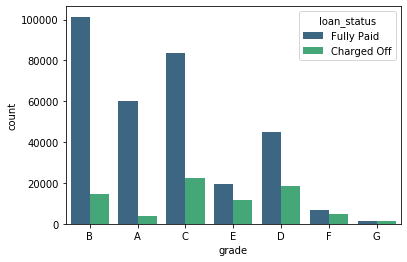

In [57]:
sns.countplot(x='grade', hue='loan_status', data=df, palette='viridis')

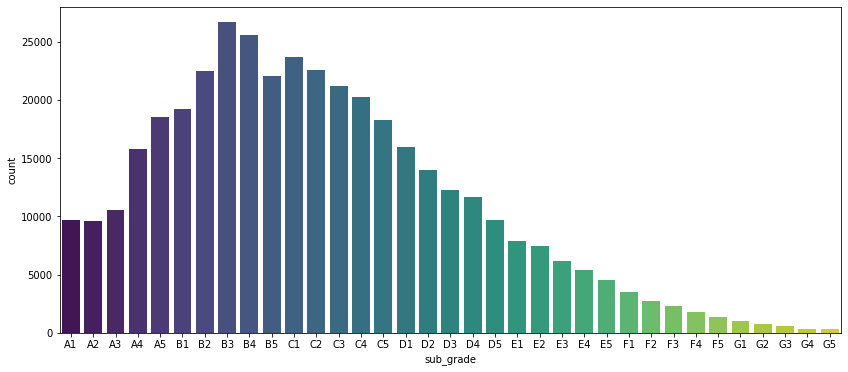

In [68]:
#Now we viz subgrades info
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade', data=df,
              order=sorted(df['sub_grade'].unique()),
              palette='viridis')

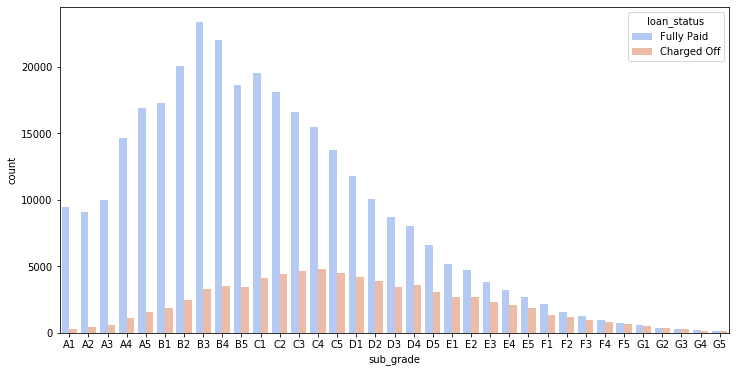

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status',
              order=sorted(df['sub_grade'].unique()),
              palette='coolwarm')

It is quite obvious that the credit grade of defaulters are worse than that of other borrowers.

We can see clearly from the graph that the proportion of defaulters are extremely high in grade *F* and *G* compared with other grades. We can see these grades in a more detailed way.

In [77]:
# create a df only containing F ang G grades
df_fg = df[(df['grade'] == 'E') | (df['grade'] == 'F')][['loan_status','grade','sub_grade']]

In [78]:
df_fg.head(3)

,loan_status,grade,sub_grade
16,Fully Paid,E,E4
41,Charged Off,E,E4
48,Charged Off,E,E1


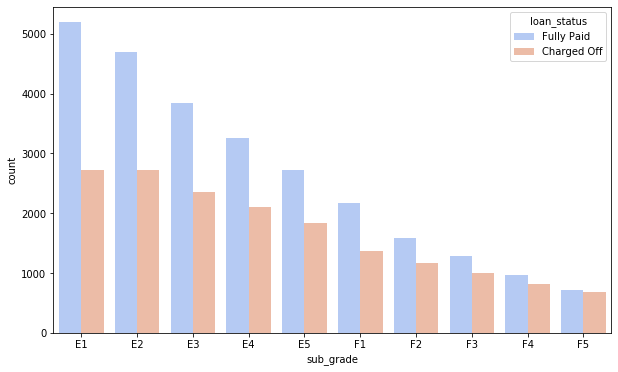

In [79]:
#viz
plt.figure(figsize=(10,6))
sns.countplot(x='sub_grade', data=df_fg, hue='loan_status',
              order=sorted(df_fg['sub_grade'].unique()),
              palette='coolwarm')

Obviously the probability of default goes up as one's credit condition deteriorates.

Now we create a new column *loan_repaid* which uses 0 and 1 indicating *Charged off* and *Fully Paid*.

In [80]:
def toLoanRepaid(x):
    if x == 'Fully Paid':
        return 1
    else:
        return 0

In [219]:
df['loan_repaid'] = df['loan_status'].apply(toLoanRepaid)

In [220]:
df[['loan_status','loan_repaid']].head(5)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


In [ ]:
#another way to achieve this
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

Now we can finally visualize the correlations between the numeric repaid indicator and each other numeric variables.

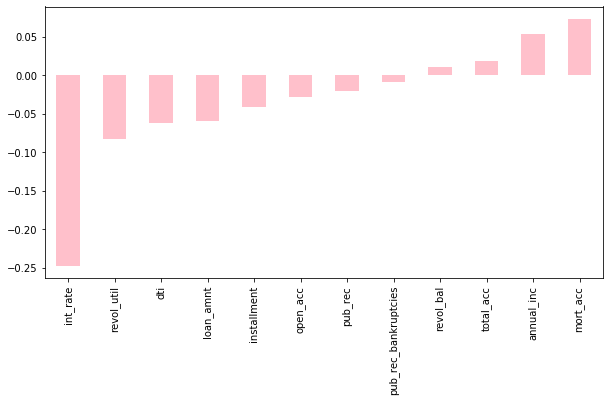

In [91]:
plt.figure(figsize=(10,5))
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar', color='pink')

It is not surprising that the higher the interest rate, the more likely a person will default, since the lender will allow for default risk when calculating the interest rate of a certain loan application.

# Feature Engineering

In [92]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


## Missing Data

In [97]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
#we can also calculate the percentage of missing data
100 * df.isnull().sum() / len(df)

Missing values are most frequent in the following columns:

- *emp_title*
- *emp_length*
- *mort_acc*

Let's first deal with *emp_title* and *emp_lengtth*

In [98]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [100]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [102]:
df['emp_title'].nunique()

173105

There are more than 170k unique job titles, which are absoltely way too much to be converted to dummy variables. Although we con may consider tokenize them and extract some interesting info, here we just drop this column.

In [221]:
df = df.drop('emp_title', axis = 1)
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


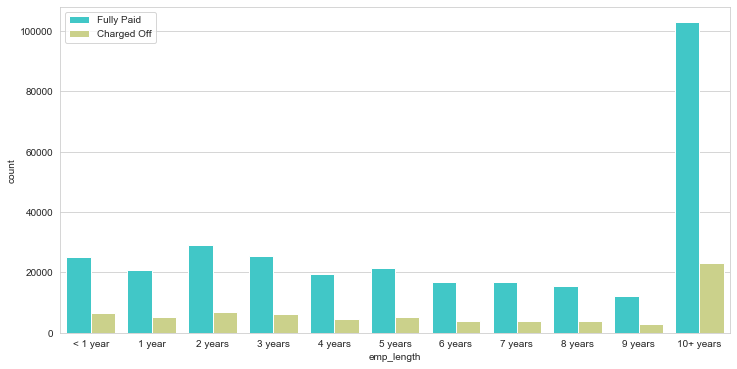

In [109]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length', data = df,
              order = ['< 1 year','1 year','2 years', 
                       '3 years', '4 years', '5 years',
                       '6 years', '7 years', '8 years', '9 years',
                       '10+ years'],
              palette='rainbow',
              hue = 'loan_status')
plt.legend(loc = 'upper left')

According to the above graph, most applicants have been employed for at least 10 years, regardless of their loan status. We can further examine the relation between employment length and loan status.

In [151]:
emp_co = df[df['loan_repaid'] == 0].groupby('emp_length').count()['loan_repaid']

In [152]:
emp_fp = df[df['loan_repaid'] == 1].groupby('emp_length').count()['loan_repaid']

In [158]:
emp_co_percent = emp_co / (emp_fp + emp_co)

In [159]:
emp_co_percent

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

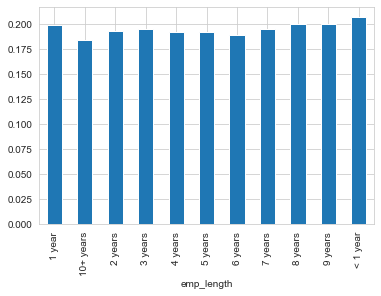

In [160]:
emp_co_percent.plot(kind='bar')

There is no dignificant difference among each emp_length group, so it is safe to drop *emp_length*.

In [222]:
df = df.drop('emp_length', axis=1)

In [223]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [163]:
feat_info('title')

The loan title provided by the borrower


In [164]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [165]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [166]:
df['title'].value_counts()

Debt consolidation                 152472
Credit card refinancing             51487
Home improvement                    15264
Other                               12930
Debt Consolidation                  11608
                                    ...  
Reducing Red                            1
ocredit card home prainting             1
Great Vacation                          1
personal loan 1                         1
Debt Consolidation and Security         1
Name: title, Length: 48817, dtype: int64

We can drop *title* as this feature is essentially identical with *purpose*

In [224]:
df = df.drop('title', axis = 1)

In [225]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Now it is time to deal with *mort_acc* feature!**

In [169]:
feat_info('mort_acc')

Number of mortgage accounts.


In [170]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

To fill the missing values in *mort_acc*, we can first calculate the correlation between this feature and others.

In [173]:
df.corr()['mort_acc'].sort_values()[:-1]

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

Looks like *mort_acc* and *total_acc* are somehow correlated. We can calculate the mean *mort_acc* for each *total_acc* value and fill the missing data in *mort_acc* with that value.

In [174]:
mean_mort = df.groupby('total_acc').mean()['mort_acc']

In [175]:
mean_mort

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [183]:
def fillin(cols):
    mort_acc = cols[0]
    tot_acc = cols[1]
    
    if pd.isnull(mort_acc) == True:
        return mean_mort.loc[tot_acc]
    else:
        return mort_acc

In [226]:
df['mort_acc'] = df[['mort_acc', 'total_acc']].apply(fillin, axis=1)

In [227]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [230]:
df['mort_acc'].describe()

count    395219.000000
mean          1.787387
std           2.063743
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

As for the missing values in *revol_util* and *pub_rec_bank...* we just drop them all as they only account for a trivial fraction of the data set.

In [228]:
df = df.dropna(axis=0)

In [229]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [192]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


## Categorical and Dummy Variables

In [196]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

There are still 12 non-numeric features and we have to go through all of them to see if we can convert them to numeric ones.

Fisrt, we deal with **term**.

In [235]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

Second, we deal with **grade**

Since *grade* is included in *sub_grade*, we can drop *grade*.

In [236]:
df.drop('grade', axis=1, inplace=True)

Thirdly, we deal with **sub_grade**.

In [207]:
sg_dum = pd.get_dummies(df['sub_grade'], drop_first=True)

In [237]:
df = pd.concat([df, sg_dum], axis=1)

In [240]:
#now we can delete 'sub_grade'
df.drop('sub_grade', axis=1, inplace=True)

In [241]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Fourly, we deal with **verification_status, application_type,initial_list_status,purpose**.

In [247]:
many_dum = pd.get_dummies(df['verification_status'], drop_first=True)
many_dum.head(2)

,Source Verified,Verified
0,0,0
1,0,0


In [248]:
for i in ['application_type','initial_list_status','purpose']:
    i_dum = pd.get_dummies(df[i], drop_first=True)
    many_dum = pd.concat([many_dum, i_dum], axis=1)

many_dum.head(2)

,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [254]:
df = pd.concat([df,many_dum], axis=1)

In [257]:
df.drop(['verification_status','application_type',
         'initial_list_status', 'purpose'], axis=1, inplace=True)

In [259]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

Fifithly, we deal with **home_ownership**.

In [260]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [267]:
#we repalce 'NONE' and 'ANY' with 'OTHER'
df['home_ownership'].replace(to_replace=['NONE','ANY'],
                             value='OTHER',
                             inplace=True)

In [268]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [269]:
# convert 'home_ownership' into dummies
ho_dum = pd.get_dummies(df['home_ownership'], drop_first=True)
ho_dum.head(1)

,OTHER,OWN,RENT
0,0,0,1


In [271]:
df = pd.concat([df, ho_dum], axis=1)
df.drop('home_ownership', axis=1, inplace=True)
df.head(1)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1


Sixthly, we deal with **address**.

In [276]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

We now extract the zip code from address and convert them to dummies.

In [284]:
df['zip_code'] = df['address'].apply(lambda x: x.split()[-1])

In [288]:
df['zip_code'].nunique()

10

In [287]:
zip_dum = pd.get_dummies(df['zip_code'], drop_first=True)
zip_dum.head(1)

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0


In [289]:
df = pd.concat([df, zip_dum], axis=1)
df.drop(['address', 'zip_code'], axis=1, inplace=True)
df.head(1)

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0


In [291]:
df.select_dtypes(include='object').columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

Finally, we deal with these three string features.

In [292]:
feat_info('issue_d')

The month which the loan was funded


This may cause data leakage and we need to drop it.

In [294]:
df.drop('issue_d', axis=1, inplace=True)

In [293]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [305]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jan-1953       1
Jul-1962       1
Aug-1964       1
Feb-1962       1
Aug-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64

We can extract the year of the earliest credit date and convert it to a numeric feature.

In [307]:
df['earlist_cr_yr'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))

In [308]:
df.drop('earliest_cr_line', axis=1, inplace=True)

As for *loan_status*, this is our target label and we have already repalce it with *loan_repaid*. So now we can drop it.

In [310]:
df.drop('loan_status', axis=1, inplace=True)

Recall that *installment* is essentially the same as *loan_amnt*, and therefore we can also abandon this feature.

In [311]:
df.drop('installment', axis=1, inplace=True)

In [312]:
df.head(1)

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earlist_cr_yr
0,10000.0,36,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,0,1,0,0,0,0,0,0,1990


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   annual_inc            395219 non-null  float64
 4   dti                   395219 non-null  float64
 5   open_acc              395219 non-null  float64
 6   pub_rec               395219 non-null  float64
 7   revol_bal             395219 non-null  float64
 8   revol_util            395219 non-null  float64
 9   total_acc             395219 non-null  float64
 10  mort_acc              395219 non-null  float64
 11  pub_rec_bankruptcies  395219 non-null  float64
 12  loan_repaid           395219 non-null  int64  
 13  A2                    395219 non-null  uint8  
 14  A3                    395219 non-null  uint8  
 15  

# Data Preprocessing

## Sampling

Since I am using a Macbook Pro which is not equipped with NVIDIA GPU, I am unable to accelerate the training process using the GPU. Therefore I have no choice but to only train the model based on 15% of the records with all features.  

Next time I may try the whole data set on Google Collab.

In [316]:
df = df.sample(n=60000, random_state=2020)

In [318]:
df.shape

(60000, 78)

## Train Test Split

In [315]:
from sklearn.model_selection import train_test_split

In [319]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

## Normalizing the Data

In [322]:
from sklearn.preprocessing import MinMaxScaler

In [323]:
scaler = MinMaxScaler().fit(X_train)

In [324]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [328]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [329]:
from tensorflow.keras.callbacks import EarlyStopping

In [370]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(39, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(19, activation='relu'))
model.add(Dropout(rate=0.5))

#binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [371]:
# set an earlystopper
ear_stop = EarlyStopping(monitor = 'val_loss', 
                         patience = 20,
                         mode = 'min',
                         verbose = 1)

In [372]:
#fit the model!!!
model.fit(x=X_train, y=y_train,
          epochs=150,
          callbacks = [ear_stop],
          validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 2s 35us/sample - loss: 0.3864 - val_loss: 0.2652
Epoch 2/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2892 - val_loss: 0.2606
Epoch 3/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2761 - val_loss: 0.2568
Epoch 4/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2725 - val_loss: 0.2548
Epoch 5/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2689 - val_loss: 0.2546
Epoch 6/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2672 - val_loss: 0.2538
Epoch 7/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.2674 - val_loss: 0.2562
Epoch 8/150
48000/48000 [==============================] - 1s 30us/sample - loss: 0.2653 - val_loss: 0.2531
Epoch 9/150
48000/48000 [==============================] - 1s 29us/sample - loss: 0.26

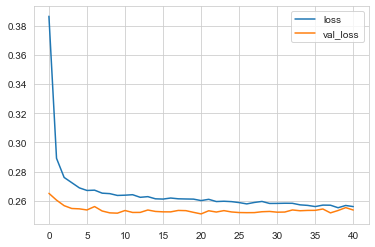

In [373]:
pd.DataFrame(model.history.history).plot(kind='line')

# Evaluation

In [351]:
from sklearn.metrics import confusion_matrix, classification_report

In [374]:
prediction_df = model.predict_classes(X_test)

In [375]:
print(confusion_matrix(y_test, prediction_df))
print('\n')
print(classification_report(y_test, prediction_df))

[[1013 1263]
 [  23 9701]]


              precision    recall  f1-score   support

           0       0.98      0.45      0.61      2276
           1       0.88      1.00      0.94      9724

    accuracy                           0.89     12000
   macro avg       0.93      0.72      0.77     12000
weighted avg       0.90      0.89      0.88     12000



# Compare with SVC

In [355]:
from sklearn.svm import SVC

In [357]:
model_svc = SVC().fit(X_train, y_train)

In [361]:
pred_svc = model.predict_classes(X_test)

In [362]:
pred_svc

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [363]:
print(confusion_matrix(y_test, pred_svc))
print('\n')
print(classification_report(y_test, pred_svc))

[[1014 1262]
 [  16 9708]]


              precision    recall  f1-score   support

           0       0.98      0.45      0.61      2276
           1       0.88      1.00      0.94      9724

    accuracy                           0.89     12000
   macro avg       0.93      0.72      0.78     12000
weighted avg       0.90      0.89      0.88     12000



In [ ]:
import tensorflow as tf
print()